In [ ]:
# BÀI THỰC HÀNH TĂNG CƯỜNG

## BÀI 1

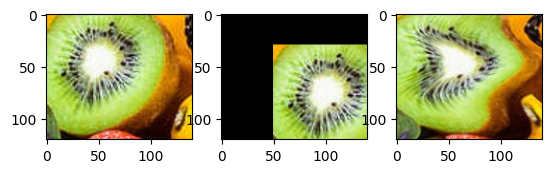

In [26]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
data = iio.imread('trai_cay.jpeg')
bmg = data[30:150, 10:150]
bmg2 = nd.shift(bmg, (30, 50, 0))
h, w, c = bmg.shape
Y, X = np.indices((h, w)).astype(float)  
X += 10 * np.sin(Y / 10)
Y += 5 * np.sin(X / 15)
bmg3 = np.stack([nd.map_coordinates(bmg[:, :, i], [Y, X], order=1, mode='reflect') for i in range(c)], axis=2)
iio.imsave('kiwi_wave.jpg', bmg3)
plt.subplot(1, 3, 1)
plt.imshow(bmg)
plt.subplot(1, 3, 2)
plt.imshow(bmg2)
plt.subplot(1, 3, 3)
plt.imshow(bmg3)
plt.show()


## Bài 2

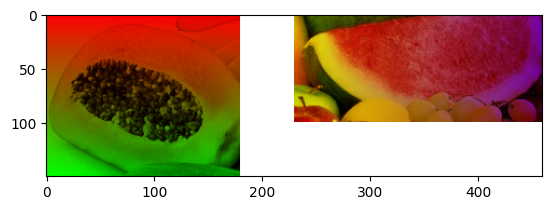

In [69]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
data = iio.imread('papaya_watermelon.webp')
papaya = data[170:320, 20:200]           
watermelon = data[180:280, 460:690]    
h1, w1, _ = papaya.shape
gradient1 = np.zeros_like(papaya, dtype=np.uint8)
for i in range(h1):
    ratio = i / h1
    r = int(255 * (1 - ratio))      
    g = int(255 * ratio)            
    gradient1[i, :, 0] = r          
    gradient1[i, :, 1] = g          
papaya_colored = (papaya / 255.0 * gradient1).astype(np.uint8)
h2, w2, _ = watermelon.shape
gradient2 = np.zeros_like(watermelon, dtype=np.uint8)
for j in range(w2):
    ratio = j / w2
    r = int(255 * (1 - ratio) + 128 * ratio)  
    g = int(255 * (1 - ratio))                
    b = int(255 * ratio)                      
    gradient2[:, j, 0] = r
    gradient2[:, j, 1] = g
    gradient2[:, j, 2] = b
watermelon_colored = (watermelon / 255.0 * gradient2).astype(np.uint8)
H = max(h1, h2)
W = w1 + w2 + 50  
output = np.zeros((H, W, 4), dtype=np.uint8)  
output[0:h1, 0:w1, :3] = papaya_colored
output[0:h1, 0:w1, 3] = 255  
output[0:h2, w1 + 50:w1 + 50 + w2, :3] = watermelon_colored
output[0:h2, w1 + 50:w1 + 50 + w2, 3] = 255 
iio.imsave('fruits_gradient.png', output)
plt.imshow(output)
plt.show()


## Bài 3

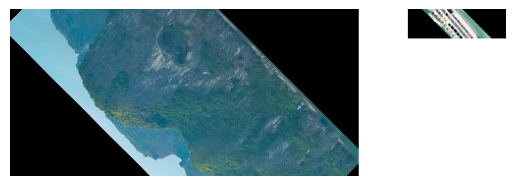

In [ ]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
data = iio.imread('nui_thuyen.jpg')
mountain = data[40:210, 5:360]        
boat = data[230:260, 470:570]           
mountain_rot = nd.rotate(mountain, 45, reshape=False)
boat_rot = nd.rotate(boat, 45, reshape=False)
mountain_mirror = np.flipud(mountain_rot)
boat_mirror = np.flipud(boat_rot)
h1, w1 = mountain_mirror.shape[:2]
h2, w2 = boat_mirror.shape[:2]
H = max(h1, h2)
W = w1 + w2 + 50  
canvas = np.ones((H, W, 3), dtype=np.uint8) * 255  
canvas[:h1, :w1] = mountain_mirror
canvas[:h2, w1 + 50 : w1 + 50 + w2] = boat_mirror
iio.imsave('mountain_boat_mirror.jpg', canvas)
plt.imshow(canvas)
plt.show()


## Bài 4

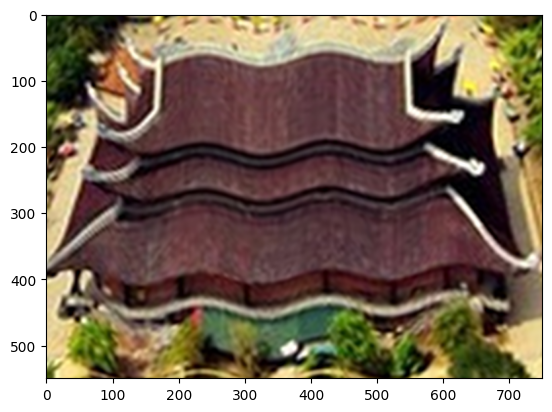

In [ ]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('ngoi_chua.jpg')
bmg = data[180:290, 240:390]
iio.imsave('pagoda1.jpg', bmg)
bdata = nd.zoom(bmg, (5, 5, 1))
h, w, c = bdata.shape
Y, X = np.indices((h, w)).astype(float)
Y += 10 * np.sin(X / 30.0)
warped = np.stack([nd.map_coordinates(bdata[..., i], [Y, X], order=1, mode='reflect')for i in range(c)], axis=-1).astype(np.uint8)
iio.imsave('pagoda_warped.jpg', warped)
plt.imshow(warped)
plt.show()


## Bài 5

Chọn phép biến đổi:
T - Tịnh tiến
X - Xoay
Z - Phóng to / Thu nhỏ
G - Làm mờ Gaussian
W - Biến dạng dạng sóng (wave)


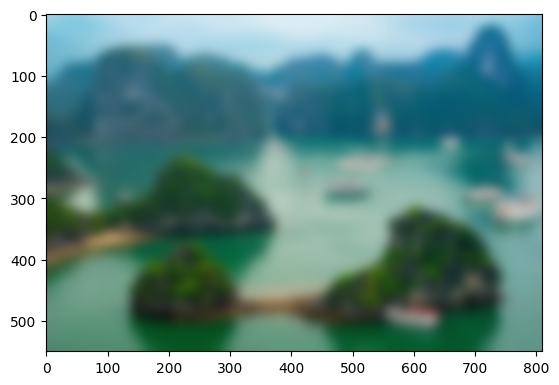

In [5]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt
images = {"1": "ngoi_chua.jpg", "2": "nui_thuyen.jpg", "3": "trai_cay.jpeg"}
print("Chọn phép biến đổi:")
print("T - Tịnh tiến")
print("X - Xoay")
print("Z - Phóng to / Thu nhỏ")
print("G - Làm mờ Gaussian")
print("W - Biến dạng dạng sóng (wave)")
chon = input("Chọn thao tác (T/X/Z/G/W): ").upper()
hinh = input("Chọn hình (1/2/3): ")
if hinh not in images:
    print("Không có ảnh!")
    exit()
data = iio.imread(images[hinh])
if chon == 'T':
    dx = int(input("Nhập số pixel theo trục ngang (x): "))
    dy = int(input("Nhập số pixel theo trục dọc (y): "))
    result = nd.shift(data, (dy, dx, 0))
elif chon == 'X':
    goc = float(input("Nhập góc xoay: "))
    rs = input("Giữ nguyên kích thước sau xoay? (y/n): ").lower() == 'y'
    result = nd.rotate(data, goc, reshape=not rs)
elif chon == 'Z':
    hs = float(input("Nhập hệ số zoom: "))
    result = nd.zoom(data, (hs, hs, 1))
elif chon == 'G':
    sigma = float(input("Nhập giá trị sigma làm mờ: "))
    result = np.zeros_like(data)
    for i in range(3):
        result[..., i] = nd.gaussian_filter(data[..., i], sigma=sigma)
elif chon == 'W':
    A = float(input("Nhập biên độ sóng : "))
    h, w, _ = data.shape
    Y, X = np.indices((h, w)).astype(float)
    X += A * np.sin(Y / 20)
    Y += A * np.sin(X / 30)
    result = np.zeros_like(data)
    for i in range(3):
        result[..., i] = nd.map_coordinates(data[..., i], [Y, X], order=1, mode='reflect')
else:
    print("Lựa chọn không hợp lệ.")
    exit()
plt.imshow(result)
plt.show()
